<a href="https://colab.research.google.com/github/pebut/Hakaton/blob/main/PandemicHakaton_track3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #–ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ —Ä–∞–±–æ—Ç—ã —Å –º–∞—Å—Å–∏–≤–∞–º–∏
import pandas as pd # –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –±–∞–∑–∞–º–∏
import math

from tensorflow.keras.models import Sequential, Model # 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #–ò—Å–ø–æ–ª—å–∑—É–µ–º –¥–ª—è to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # –ø–æ–¥–∫–ª—é—á–∞–µ–º –∫–æ–ª–±—ç–∫–∏

from sklearn.preprocessing import StandardScaler # 
from sklearn.model_selection import train_test_split # –î–ª—è —Ä–∞–∑–±–∏–≤–∫–∏ –Ω–∞ –≤—ã–±–æ—Ä–∫–∏
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #–î–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ —Å–≤–æ–µ–π –∫–∞—Ä—Ç–∏–Ω–∫–∏

import random #–î–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª 
import math # –î–ª—è –æ–∫—Ä—É–≥–ª–µ–Ω–∏—è
#import os #–î–ª—è —Ä–∞–±–æ—Ç—ã —Å —Ñ–∞–π–ª–∞–º–∏ 
import re #
import matplotlib.pyplot as plt #
%matplotlib inline

from IPython.display import clear_output


In [3]:
from google.colab import drive # –ü–æ–¥–∫–ª—é—á–∞–µ–º –¥–∏—Å–∫
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


–û—Å—Ç–æ—Ä–æ–∂–Ω–æ! –ó–∞–ø—É—Å–∫ –≤—Å–µ—Ö —Ä–∞–∑–¥–µ–ª–æ–≤ —Å—Ä–∞–∑—É, –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫—É –ø–∞–º—è—Ç–∏ –∏ —Å–µ—Å—Å–∏—è –ø–µ—Ä–µ–∑–∞–ø—É—Å—Ç–∏—Ç—Å—è.

##–ó–∞–≥—Ä—É–∂–∞–µ–º –±–∞–∑—É –∏ —Å–º–æ—Ç—Ä–∏–º —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ



In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

fixed_df = pd.read_csv('/content/drive/MyDrive/Hakaton/train.csv', sep=';',encoding='utf8')



In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Hakaton/test.csv', sep=';',encoding='utf8')

In [3]:
gorod = pd.read_csv('/content/drive/MyDrive/Hakaton/spisok_gorodov.csv', sep=';',encoding='utf8')

In [4]:
gorod.head()

No           City        Type
0   1       –ê–¥—ã–≥–µ–π—Å–∫       –ú–∞–ª—ã–π
1   2         –ú–∞–π–∫–æ–ø     –ë–æ–ª—å—à–æ–π
2   3  –ì–æ—Ä–Ω–æ-–ê–ª—Ç–∞–π—Å–∫     –°—Ä–µ–¥–Ω–∏–π
3   4         –ê–ª–µ–π—Å–∫       –ú–∞–ª—ã–π
4   5        –ë–∞—Ä–Ω–∞—É–ª  –ö—Ä—É–ø–Ω–µ–π—à–∏–π

In [4]:
f=open('/content/drive/MyDrive/Hakaton/unique_pos.txt')
s=(f.read())
pos=s.split(',')#–≤–º–µ—Å—Ç–æ –∑–∞–ø—è—Ç–æ–π –º–æ–∂–µ—Ç –±–∏—Ç—å —Ç–æ—á–∫–∞, –ª—é–±–æ–π —Å–∏–º–≤–æ–ª
print(pos)   #(–µ—Å–ª–∏ —É –≤–∞—Å –≤ —Ñ–∞–π–ª–µ –¥–∞–Ω–∏–µ —á–µ—Ä–µ–∑ –ø—Ä–æ–±–µ–ª —Ç–æ–ø–∏—à–µ–º  –ø—Ä–æ–±–µ–ª, —á–µ—Ä–µ–∑ —Ç–æ—á–∫—É-—Ç–æ—á–∫—É)
f.close()

['–∏–Ω–∂–µ–Ω–µ—Ä', '–º–æ–Ω—Ç–∞–∂–Ω–∏–∫', '—é—Ä–∏—Å—Ç', '–ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–π –º–µ–Ω–µ–¥–∂–µ—Ä', '–¥–µ–ª–æ–ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å', '–∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–∏–≤–Ω–∞—è —Ä–∞–±–æ—Ç–∞', '–Ω–∞—á–∞–ª—å–Ω–∏–∫ –æ—Ç–¥–µ–ª–∞ –æ—Ö—Ä–∞–Ω—ã —Ç—Ä—É–¥–∞', 'hr –º–µ–Ω–µ–¥–∂–µ—Ä', '–ø–æ–¥—Å–æ–±–Ω—ã–π —Ä–∞–±–æ—á–∏–π', '—é—Ä–∏—Å—Ç', '–ø–æ–º–æ—â–Ω–∏–∫', '—Å–µ–∫—Ä–µ—Ç–∞—Ä—å', '—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç', '–ª–∏—á–Ω—ã–π –≤–æ–¥–∏—Ç–µ–ª—å', '–≤–æ–¥–∏—Ç–µ–ª—å . –∫–∞—Ç –≤.—Å.', '—Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –æ—Ç–¥–µ–ª–∞ –ø—Ä–æ–¥–∞–∂', '–º–µ–Ω–µ–¥–∂–µ—Ä –ø–æ –∑–∞–∫—É–ø–∫–∞–º', '–Ω–∞—á–∞–ª—å–Ω–∏–∫ –æ—Ç–¥–µ–ª–∞ –∑–∞–∫—É–ø–æ–∫', '–∏–Ω—Å–ø–µ–∫—Ç–æ—Ä', '–±—É—Ä–∏–ª—å—â–∏–∫ –∫–∞–ø–∏—Ç–∞–ª—å–Ω–æ–≥–æ —Ä–µ–º–æ–Ω—Ç–∞ —Å–∫–≤–∞–∂–∏–Ω', '–ø—Ä–æ–¥–∞–≤–µ—Ü –ø—Ä–æ–¥–æ–≤–æ–ª—å—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤', '–≥–ª–∞–≤–Ω—ã–π/–∑–∞–º–µ—Å—Ç–∏—Ç–µ–ª—å –≥–ª–∞–≤–Ω–æ–≥–æ –±—É—Ö–≥–∞–ª—Ç–µ—Ä–∞', '–ø—Å–∏—Ö–æ–ª–æ–≥', '–∞—Ä—Ö–∏—Ç–µ–∫—Ç–æ—Ä –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã—Ö –∂–∏–ª—ã—Ö –¥–æ–º–æ–≤', '–º–µ–Ω–µ–¥–∂–µ—Ä', '—É–±–æ—Ä—â–∏–∫ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏

In [5]:
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–∑—é–º–µ –∏ –∫—Ä–∏—Ç–µ—Ä–∏–∏
print(fixed_df.shape)

(306270, 25)


In [9]:
fixed_df.head(10)

id                                           position  ... publish_date  salary
0   0                                         –°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç  ...   2020-05-07   37500
1   1                                           –õ–∞–±–æ—Ä–∞–Ω—Ç  ...   2020-10-27   14000
2   3    –°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç, –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä, –±—É—Ö–≥–∞–ª—Ç–µ—Ä, —ç–∫–æ–Ω–æ–º–∏—Å—Ç  ...   2020-02-04   24600
3   4                                         –°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç  ...   2020-09-19   16075
4   5                             –ò–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä –ø–æ –ø–ª–∞–≤–∞–Ω–∏—é  ...   2020-04-21   22080
5   8                                 —É—á–∏—Ç–µ–ª—å —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏  ...   2019-08-09   31140
6   9                                      –∫–æ–Ω—Ç—Ä–æ–ª–µ—Ä –æ—Ç–∫  ...   2020-08-01   27600
7  10  –Æ—Ä–∏—Å—Ç, –Æ—Ä–∏—Å–ø—Ä—É–¥–µ–Ω—Ü–∏—è, –§–°–°–ü, –§–µ–¥–µ—Ä–∞–ª—å–Ω–∞—è –°–ª—É–∂–±–∞...  ...   2020-05-27   33120
8  12                                           –ö–æ–Ω–¥–∏—Ç–µ—Ä  ...   2020-04-25   22500
9  13                                     –ë—É—Ä–∏–ª—å—â–∏–∫ –≠–†–ë–°  ...   2020-04-20  139104

[10 rows x 25 columns]

In [22]:
# –ü—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö
n = 0 # –ë–µ—Ä–µ–º –ø–µ—Ä–≤–æ–µ —Ä–µ–∑—é–º–µ
for i in range(len(fixed_df.values[n])): # –í—ã–≤–æ–¥–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ –∫–∞–∂–¥–æ–π –≥—Ä–∞—Ñ—ã —Ä–µ–∑—é–º–µ
  print(i, " ", fixed_df.values[n][i])

0   0
1   –°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç
2   –¢—É–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å
3   –ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω–∞—è —Å–ª—É–∂–±–∞, –Ω–µ–∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏
4   7100000100000
5   –¢—É–ª–∞
6   –ù–µ–∑–∞–∫–æ–Ω—á–µ–Ω–Ω–æ–µ –≤—ã—Å—à–µ–µ
7   [B]
8   –†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è
9   –ü–æ–ª–Ω—ã–π —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å
10   –ü–æ–ª–Ω–∞—è –∑–∞–Ω—è—Ç–æ—Å—Ç—å
11   21.0
12   –ú—É–∂—Å–∫–æ–π
13   3
14   35000
15   False
16   False
17   True
18   nan
19   nan
20   64.0
21   2020-05-07
22   2020-05-08
23   2020-05-07
24   37500


## –ü–∞—Ä—Å–∏–º –±–∞–∑—É







In [5]:
fixed_df = fixed_df.drop(fixed_df[fixed_df.salary<10].index, axis=0 )
fixed_df.shape

(303851, 25)

In [6]:
def getParameterPos(arg):
  out=[]
  for i in range(len(pos)):
   out.append(0)
  if arg==arg:
    arg = str.lower(arg)
    for j in range(len(pos)-1):
      if pos[j] in arg:
        out[j] = 1
  return out



#! Boolean —Ç–∏–ø –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è —Å —É—á–µ—Ç–æ–º NaN
def getParameterBool(arg):
  out = [0,0]
  if arg =='True':
    out = [1,0]
  elif arg=='False':
    out = [0,1]
  return out

#! –î–∞–Ω–Ω—ã–µ –æ –ø–æ–ª–µ gender
def getParameterSex(arg):
  out = [0,0]
  #–ï—Å–ª–∏ –ú, —Ç–æ 1. –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é 0 - –ñ
  if arg=='–ú—É–∂—Å–∫–æ–π':
    out = [1,0]
  elif arg=='–ñ–µ–Ω—Å–∫–∏–π':
    out = [0,1]
  return out

#! –ü–æ–ª—É—á–µ–Ω–Ω—ã–π –≤–æ–∑—Ä–∞—Å—Ç –ø—Ä–µ–≤—Ä–∞—â–∞–µ–º –≤ –∫–ª–∞—Å—Å –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
def getParameterAgeVect(arg):
  if arg > 14 and arg < 80:
    arg=arg
  else: arg = 0
  outClass =int((arg-13)/5)
  outClass = max(0, min(10,outClass))
  
  # –ù–∞ –≤—ã—Ö–æ–¥–µ –ø–æ–ª—É—á–∞–µ–º –≤–µ–∫—Ç–æ—Ä —Å –Ω—É–∂–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–µ–π –≤–æ–∑—Ä–∞—Å—Ç–∞
  return list(utils.to_categorical(outClass, 11).astype('int'))

#! –ü–æ–ª—É—á–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç–µ—Ä –≤–æ–¥–∏—Ç–µ–ª—å—Å–∫–∏—Ö –ø—Ä–∞–≤
def getParameterdriveLicence(arg):
  out = [0, 0, 0, 0, 0, 0]
  if arg ==arg:
    if ("A" in arg):    out[0]=1
    if ("B" in arg):      out[1]=1
    if ("C" in arg):   out[2]=1
    if ("D" in arg): out[3]=1
    if ("E" in arg): out[4]=1
    if ("–ê" in arg):    out[0]=1
    if ("–í" in arg):      out[1]=1
    if ("–°" in arg):   out[2]=1
    if ("–ï" in arg): out[4]=1
  return out





#! –î–∞–Ω–Ω—ã–µ –æ –≥–æ—Ä–æ–¥–µ
def getParameterLocality(arg):
  out= [0, 0, 0, 0, 0, 0]
  if arg==arg:
    citytype = gorod[gorod.City==arg].Type.to_string(index=False)
    if citytype == " –ú–∞–ª—ã–π":            out= [0, 0, 0, 0, 0, 1]
    if citytype == " –°—Ä–µ–¥–Ω–∏–π":          out= [0, 0, 0, 0, 1, 0]
    if citytype == " –ë–æ–ª—å—à–æ–π":          out= [0, 0, 0, 1, 0, 0]
    if citytype == " –ö—Ä—É–ø–Ω—ã–π":          out= [0, 0, 1, 0, 0, 0]
    if citytype == " –ö—Ä—É–ø–Ω–µ–π—à–∏–π":          out= [0, 1, 0, 0, 0, 0]
    if citytype == " –ú–∏–ª–ª–∏–æ–Ω–Ω–∏–∫":       out= [1, 0, 0, 0, 0, 0]
    
  return out

#! –î–∞–Ω–Ω—ã–µ –æ –∂–µ–ª–∞–µ–º–æ–π –∑–∞–Ω—è—Ç–æ—Å—Ç–∏
def getParameterEmployment(arg):
  out= [0, 0, 0, 0, 0, 0]
  if ('–ü–æ–ª–Ω–∞—è –∑–∞–Ω—è—Ç–æ—Å—Ç—å' in arg):           out[0]=1
  if ('–ß–∞—Å—Ç–∏—á–Ω–∞—è –∑–∞–Ω—è—Ç–æ—Å—Ç—å' in arg):  out[1]=1
  if ('–£–¥–∞–ª–µ–Ω–Ω–∞—è' in arg):     out[2]=1
  if ('–°–µ–∑–æ–Ω–Ω–∞—è' in arg):     out[3]=1
  if ('–í—Ä–µ–º–µ–Ω–Ω–∞—è' in arg):     out[4]=1
  if ('–°—Ç–∞–∂–∏—Ä–æ–≤–∫–∞' in arg):     out[5]=1
  return out
  



#! –î–∞–Ω–Ω—ã–µ –æ –∂–µ–ª–∞–µ–º–æ–º –≥—Ä–∞—Ñ–∏–∫–µ —Ä–∞–±–æ—Ç—ã
def getParameterSchedule(arg):
  out = [0, 0, 0, 0, 0, 0]
  if ("–ü–æ–ª–Ω—ã–π —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å" in arg):    out[0]=1
  if ("–ù–µ–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å" in arg):      out[1]=1
  if ("–ù–µ–ø–æ–ª–Ω—ã–π —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å" in arg):   out[2]=1
  if ("–°–º–µ–Ω–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫" in arg): out[3]=1
  if ("–ì–∏–±–∫–∏–π –≥—Ä–∞—Ñ–∏–∫" in arg): out[4]=1
  if ("–í–∞—Ö—Ç–æ–≤—ã–π –º–µ—Ç–æ–¥" in arg): out[5]=1
  return out


#! –î–∞–Ω–Ω—ã–µ –æ–± –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–∏
def getParameterEducation(arg):
  out = [0, 0, 0, 0] #–ü–æ —É–º–æ–ª—á–∞–Ω–∏—é –Ω–µ —É–∫–∞–∑–∞–Ω–æ
  if arg == "–í—ã—Å—à–µ–µ":  out[0] = 1
  if arg == "–ù–µ–∑–∞–∫–æ–Ω—á–µ–Ω–Ω–æ–µ –≤—ã—Å—à–µ–µ":      out[1] = 1
  if arg == "–°—Ä–µ–¥–Ω–µ–µ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ–µ":      out[2] = 1
  if arg == "–°—Ä–µ–¥–Ω–µ–µ":      out[3] = 1
  return out


List = ['–ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω–∞—è —Å–ª—É–∂–±–∞, –Ω–µ–∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏',
       '–ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–∏–≤–Ω–∞—è —Ä–∞–±–æ—Ç–∞, —Å–µ–∫—Ä–µ—Ç–∞—Ä–∏–∞—Ç, –ê–•–û',
       '–ó–¥—Ä–∞–≤–æ–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ, —Å–ø–æ—Ä—Ç, –∫—Ä–∞—Å–æ—Ç–∞, —Å–æ—Ü–∏–∞–ª—å–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ',
       '–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, –Ω–∞—É–∫–∞',
       '–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ, —Ä–µ–º–æ–Ω—Ç, —Å—Ç—Ä–æ–π–º–∞—Ç–µ—Ä–∏–∞–ª—ã, –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å',
       '–ü–∏—â–µ–≤–∞—è –ø—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ—Å—Ç—å', '–î–æ–±—ã–≤–∞—é—â–∞—è –ø—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ—Å—Ç—å',
       '–ü—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ', '–¢—É—Ä–∏–∑–º, –≥–æ—Å—Ç–∏–Ω–∏—Ü—ã, —Ä–µ—Å—Ç–æ—Ä–∞–Ω—ã',
       '–†–∞–±–æ—Ç—ã, –Ω–µ —Ç—Ä–µ–±—É—é—â–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏', '–Æ—Ä–∏—Å–ø—Ä—É–¥–µ–Ω—Ü–∏—è',
       '–§–∏–Ω–∞–Ω—Å—ã, –∫—Ä–µ–¥–∏—Ç, —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏–µ, –ø–µ–Ω—Å–∏–æ–Ω–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ',
       '–ü—Ä–æ–¥–∞–∂–∏, –∑–∞–∫—É–ø–∫–∏, —Å–Ω–∞–±–∂–µ–Ω–∏–µ, —Ç–æ—Ä–≥–æ–≤–ª—è',
       '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏, —Ç–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–∏, —Å–≤—è–∑—å',
       '–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç, –∞–≤—Ç–æ–±–∏–∑–Ω–µ—Å, –ª–æ–≥–∏—Å—Ç–∏–∫–∞, —Å–∫–ª–∞–¥, –í–≠–î',
       '–ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å, —Å–ª—É–∂–±—ã –æ—Ö—Ä–∞–Ω—ã', '–ñ–ö–•, —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—è',
       '–≠–ª–µ–∫—Ç—Ä–æ—ç–Ω–µ—Ä–≥–µ—Ç–∏–∫–∞', '–ú–∞—Ä–∫–µ—Ç–∏–Ω–≥, —Ä–µ–∫–ª–∞–º–∞, PR',
       '–†–∞–±–æ—á–∏–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏',
       '–•–∏–º–∏—á–µ—Å–∫–∞—è, –Ω–µ—Ñ—Ç–µ—Ö–∏–º–∏—á–µ—Å–∫–∞—è, —Ç–æ–ø–ª–∏–≤–Ω–∞—è –ø—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ—Å—Ç—å',
       '–í—ã—Å—à–∏–π –º–µ–Ω–µ–¥–∂–º–µ–Ω—Ç', '–õ–µ–≥–∫–∞—è –ø—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ—Å—Ç—å',
       '–£—Å–ª—É–≥–∏ –Ω–∞—Å–µ–ª–µ–Ω–∏—é, —Å–µ—Ä–≤–∏—Å–Ω–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ', '–ú–∞—à–∏–Ω–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ',
       '–°–µ–ª—å—Å–∫–æ–µ —Ö–æ–∑—è–π—Å—Ç–≤–æ, —ç–∫–æ–ª–æ–≥–∏—è, –≤–µ—Ç–µ—Ä–∏–Ω–∞—Ä–∏—è',
       '–ö–∞–¥—Ä–æ–≤–∞—è —Å–ª—É–∂–±–∞, —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø–µ—Ä—Å–æ–Ω–∞–ª–æ–º',
       '–ò—Å–∫—É—Å—Å—Ç–≤–æ, –∫—É–ª—å—Ç—É—Ä–∞ –∏ —Ä–∞–∑–≤–ª–µ—á–µ–Ω–∏—è',
       '–õ–µ—Å–Ω–∞—è, –¥–µ—Ä–µ–≤–æ–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—é—â–∞—è, —Ü–µ–ª–ª—é–ª–æ–∑–Ω–æ-–±—É–º–∞–∂–Ω–∞—è –ø—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ—Å—Ç—å',
       '–ú–µ—Ç–∞–ª–ª—É—Ä–≥–∏—è, –º–µ—Ç–∞–ª–ª–æ–æ–±—Ä–∞–±–æ—Ç–∫–∞', '–î–æ–º–∞—à–Ω–∏–π –ø–µ—Ä—Å–æ–Ω–∞–ª',
       '–ö–æ–Ω—Å–∞–ª—Ç–∏–Ω–≥, —Å—Ç—Ä–∞—Ç–µ–≥–∏—á–µ—Å–∫–æ–µ —Ä–∞–∑–≤–∏—Ç–∏–µ, —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ',
       '–ù–∞—á–∞–ª —Ç—Ä—É–¥–æ–≤—É—é –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å']

#! –î–∞–Ω–Ω—ã–µ –æ –∏–Ω–¥—É—Å—Ç—Ä–∏–∏
def getParameterIndustry(arg):
  out=[]
  for i in range(len(List)):
   out.append(0)
  if arg==arg:
    out[List.index(arg)] = 1
  return out

#! –î–∞–Ω–Ω—ã–µ –æ –≥—Ä–∞–∂–¥–∞–Ω—Å—Ç–≤–µ
def getParameterCitizenship(arg):
   out=[0,0]
   if arg =='–†–æ—Å—Å–∏–π—Å–∫–∞—è –§–µ–¥–µ—Ä–∞—Ü–∏—è': out = [1,0]
   else: out = [0,1]
   return out


List_reg = ['–ê–ª—Ç–∞–π—Å–∫–∏–π –∫—Ä–∞–π', '–°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–£–ª—å—è–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π', '–ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ë—É—Ä—è—Ç–∏—è',
       '–ö–∞–ª–∏–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–û–º—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π', '–Ø–º–∞–ª–æ-–ù–µ–Ω–µ—Ü–∫–∏–π –∞–≤—Ç–æ–Ω–æ–º–Ω—ã–π –æ–∫—Ä—É–≥',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω', '–ü–µ–Ω–∑–µ–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–°–∞–º–∞—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–¢—É–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –•–∞–∫–∞—Å–∏—è', '–ö–æ—Å—Ç—Ä–æ–º—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–¢—é–º–µ–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–≥. –ú–æ—Å–∫–≤–∞', '–ë–µ–ª–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ü–µ—Ä–º—Å–∫–∏–π –∫—Ä–∞–π', '–ù–æ–≤–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫–∏–π –∞–≤—Ç–æ–Ω–æ–º–Ω—ã–π –æ–∫—Ä—É–≥ - –Æ–≥—Ä–∞',
       '–í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ò—Ä–∫—É—Ç—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ö—É—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ü—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ü—Ä–∏–º–æ—Ä—Å–∫–∏–π –∫—Ä–∞–π', '–ö—É—Ä–≥–∞–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ó–∞–±–∞–π–∫–∞–ª—å—Å–∫–∏–π –∫—Ä–∞–π', '–≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥', '–ö–∞–º—á–∞—Ç—Å–∫–∏–π –∫—Ä–∞–π',
       '–ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–û—Ä–µ–Ω–±—É—Ä–≥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–Ø—Ä–æ—Å–ª–∞–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–¢–æ–º—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–û—Ä–ª–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ß–µ—á–µ–Ω—Å–∫–∞—è –†–µ—Å–ø—É–±–ª–∏–∫–∞', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ê–ª—Ç–∞–π',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –î–∞–≥–µ—Å—Ç–∞–Ω', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–æ–º–∏',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –°–∞—Ö–∞ (–Ø–∫—É—Ç–∏—è)', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö—Ä—ã–º',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ú–∞—Ä–∏–π –≠–ª', '–†—è–∑–∞–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ò–≤–∞–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ö–∞–ª—É–∂—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω',
       '–í–æ—Ä–æ–Ω–µ–∂—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–°—Ç–∞–≤—Ä–æ–ø–æ–ª—å—Å–∫–∏–π –∫—Ä–∞–π',
       '–ö–µ–º–µ—Ä–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–í–æ–ª–æ–≥–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–•–∞–±–∞—Ä–æ–≤—Å–∫–∏–π –∫—Ä–∞–π',
       '–°–∞—Ä–∞—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ú—É—Ä–º–∞–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ê—Å—Ç—Ä–∞—Ö–∞–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ê–º—É—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–¢–≤–µ—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ê—Ä—Ö–∞–Ω–≥–µ–ª—å—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ú–∞–≥–∞–¥–∞–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ß—É–≤–∞—à—Å–∫–∞—è –†–µ—Å–ø—É–±–ª–∏–∫–∞', '–õ–∏–ø–µ—Ü–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –°–µ–≤–µ—Ä–Ω–∞—è –û—Å–µ—Ç–∏—è-–ê–ª–∞–Ω–∏—è', '–£–¥–º—É—Ä—Ç—Å–∫–∞—è –†–µ—Å–ø—É–±–ª–∏–∫–∞',
       '–°–º–æ–ª–µ–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–ë—Ä—è–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–∞–ª–º—ã–∫–∏—è',
       '–≥. –°–µ–≤–∞—Å—Ç–æ–ø–æ–ª—å', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–∞—Ä–∞—á–∞–µ–≤–æ-–ß–µ—Ä–∫–µ—Å–∏—è',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–∞–±–∞—Ä–¥–∏–Ω–æ-–ë–∞–ª–∫–∞—Ä–∏—è', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ê–¥—ã–≥–µ—è',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ú–æ—Ä–¥–æ–≤–∏—è', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ò–Ω–≥—É—à–µ—Ç–∏—è',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–∞—Ä–µ–ª–∏—è', '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –¢—ã–≤–∞', '–ö–∏—Ä–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–¢–∞–º–±–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–°–∞—Ö–∞–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ß—É–∫–æ—Ç—Å–∫–∏–π –∞–≤—Ç–æ–Ω–æ–º–Ω—ã–π –æ–∫—Ä—É–≥', '–ï–≤—Ä–µ–π—Å–∫–∞—è –∞–≤—Ç–æ–Ω–æ–º–Ω–∞—è –æ–±–ª–∞—Å—Ç—å',
       '–ù–µ–Ω–µ—Ü–∫–∏–π –∞–≤—Ç–æ–Ω–æ–º–Ω—ã–π –æ–∫—Ä—É–≥', '–≥. –ë–∞–π–∫–æ–Ω—É—Ä']

#! –î–∞–Ω–Ω—ã–µ –æ —Ä–µ–≥–∏–æ–Ω–µ
def getParameterRegion(arg):
  out = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  #for i in range(len(List_reg)-1):
  # out.append(0)
  if arg==arg:
    out[List_reg.index(arg)] = 1
   
  return out     



  

#! –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ–ø—ã—Ç–∞ —Ä–∞–±–æ—Ç—ã
def getParameterExperienceVector(arg):
  out = arg*12
  outClass = 0
  if (out > 6): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 6 –º–µ—Å—è—Ü–µ–≤
    outClass = 1
  if (out > 12): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 12 –º–µ—Å—è—Ü–µ–≤
    outClass = 2
  if (out > 24): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 24 –º–µ—Å—è—Ü–µ–≤
    outClass = 3
  if (out > 36): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 36 –º–µ—Å—è—Ü–µ–≤
    outClass = 4
  if (out > 60): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 60 –º–µ—Å—è—Ü–µ–≤
    outClass = 5
  if (out > 96): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 96 –º–µ—Å—è—Ü–µ–≤
    outClass = 6
  if (out > 120): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 120 –º–µ—Å—è—Ü–µ–≤
    outClass = 7
  if (out > 156): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 156 –º–µ—Å—è—Ü–µ–≤
    outClass = 8
  if (out > 192): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 192 –º–µ—Å—è—Ü–µ–≤
    outClass = 9 
  if (out > 240): # –µ—Å–ª–∏ –±–æ–ª—å—à–µ 240 –º–µ—Å—è—Ü–µ–≤
    outClass = 10
  
  return list(utils.to_categorical(outClass, 11).astype('int'))





In [7]:
def getAllParameters(val):
  #position = getParameterPos(val[1])
  region = getParameterRegion(val[2])
  industry = getParameterIndustry(val[3])
  locality_name =getParameterLocality(val[5])
  education_type = getParameterEducation(val[6])
  drive_licences = getParameterdriveLicence(val[7])
  citizenship = getParameterCitizenship([val[8]])
  schedule = getParameterSchedule(val[9])
  employement_type = getParameterEmployment(val[10])
  age = getParameterAgeVect(val[11])
  gender = getParameterSex(val[12])
  experience = getParameterExperienceVector(val[13])
  relocation_ready = getParameterBool(val[15])
  travel_ready = getParameterBool(val[16])
  retraining_ready = getParameterBool(val[17])
  is_worldskills_participant = getParameterBool(val[18])
  has_qualifications = getParameterBool(val[19])
  #completeness_rate	=val[20]
  
  out = []
  #out +=(position)
  out +=(region)
  out += industry
  out +=locality_name
  out +=education_type
  out +=drive_licences
  out +=citizenship
  out +=schedule
  out +=employement_type
  out +=age
  out +=gender
  out +=experience
  out +=relocation_ready
  out +=travel_ready
  out +=retraining_ready
  out +=is_worldskills_participant
  out +=has_qualifications
  #out +=completeness_rate

  return out
 

In [8]:
# –°–æ–∑–¥–∞–µ–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫—É
def get01Data(values):
  xTrain = []
  yTrain = []
  
  # –ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –±—É–¥–µ–º –∑–∞—Ä–ø–ª–∞—Ç—É
  for val in values:
    y = val[24]
    
    # –í—Å–µ, —á—Ç–æ –Ω–µ –∑–∞—Ä–ø–ª–∞—Ç–∞ - –æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞
    if (y != -1):
      x = getAllParameters(val)
      xTrain.append(x)
      yTrain.append(y/1000)
  
  xTrain = np.array(xTrain)
  yTrain = np.array(yTrain)

  
  return (xTrain, yTrain)

In [10]:
# –°–æ–∑–¥–∞–µ–º —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É
def getTestData(values):
  xTrain = []
  for val in values:
    x = getAllParameters(val)
    xTrain.append(x)
  
  xTrain = np.array(xTrain)
 

  
  return xTrain

In [9]:
(xTrain01, yTrain) = get01Data(fixed_df.values) # –ò–∑–≤–ª–µ–∫–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–≥—Ä—É–∂–µ–Ω–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö

In [14]:
# –†–∞–∑–º–µ—Ä –Ω–∞–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –∑–∞—Ä–ø–ª–∞—Ç
print(xTrain01.shape) 
print(yTrain.shape)
# –ü—Ä–∏–º–µ—Ä –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
n = 300000 
print(xTrain01[n])
print(yTrain[n])

(303851, 183)
(303851,)
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
58.12


In [54]:
xTest = getTestData(test.values)

In [55]:
print(xTest.shape)
n = 1000 
print(xTest[n])

(131259, 183)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## –ù–µ–π—Ä–æ–Ω–∫–∞ –ø–æ –ø—Ä–æ—Å—Ç—ã–º –¥–∞–Ω–Ω—ã–º



Epoch 1/70
517/517 - 4s - loss: 2365.3860 - mae: 33.4420 - val_loss: 1826.1149 - val_mae: 24.5356
Epoch 2/70
517/517 - 2s - loss: 1326.4443 - mae: 20.1436 - val_loss: 1218.2352 - val_mae: 20.1270
Epoch 3/70
517/517 - 2s - loss: 1121.6237 - mae: 19.8689 - val_loss: 1156.2651 - val_mae: 20.0876
Epoch 4/70
517/517 - 2s - loss: 1069.8448 - mae: 19.3864 - val_loss: 1109.6249 - val_mae: 19.4664
Epoch 5/70
517/517 - 2s - loss: 1029.4326 - mae: 18.8375 - val_loss: 1070.4845 - val_mae: 18.8398
Epoch 6/70
517/517 - 2s - loss: 996.8895 - mae: 18.3714 - val_loss: 1040.9087 - val_mae: 18.4283
Epoch 7/70
517/517 - 1s - loss: 972.2258 - mae: 18.0497 - val_loss: 1019.4454 - val_mae: 18.0745
Epoch 8/70
517/517 - 2s - loss: 957.1545 - mae: 17.8249 - val_loss: 1006.6157 - val_mae: 17.9676
Epoch 9/70
517/517 - 2s - loss: 946.3981 - mae: 17.6585 - val_loss: 998.3024 - val_mae: 17.8841
Epoch 10/70
517/517 - 1s - loss: 940.7048 - mae: 17.5721 - val_loss: 991.9510 - val_mae: 17.6482
Epoch 11/70
517/517 - 2s -

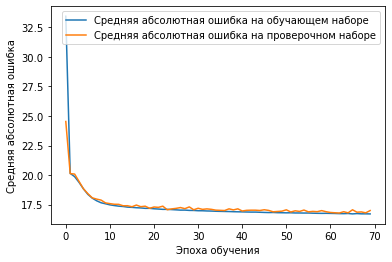

In [71]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏
model = Sequential()
model.add(BatchNormalization(input_shape=(xTrain01.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(xTrain01, 
                    yTrain, 
                    epochs=70, 
                    batch_size=500,
                    validation_split=0.15, 
                    verbose=2)

plt.plot(history.history['mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ')
plt.plot(history.history['val_mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ')
plt.xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞')
plt.legend()
plt.show()

In [72]:
# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∏ –ø—Ä–∏–≤–æ–¥–∏–º –µ–≥–æ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–º—É –≤–∏–¥—É
pred = model.predict(xTrain01)
pred = pred.flatten()
# –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ 
delta = pred - yTrain
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

16.909483729960492


In [73]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è —Ç–µ—Å—Ç–∞
pred = model.predict(xTest)
pred.flatten()
pred[3]

array([33.96067], dtype=float32)

In [74]:
# –í –∫–∞—á–µ—Å—Ç–≤–µ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö –∏—Å–ø–æ–ª—å–∑—É–µ–º –≥–æ—Ç–æ–≤—É—é –±–∏–±–ª–∏–æ—Ç–µ–∫—É 
yScaler = StandardScaler()

# –°–∫–∞—Ä–º–ª–∏–≤–∞–µ–º –æ–±—ä–µ–∫—Ç—É –¥–≤—É–º–µ—Ä–Ω—ã–π –≤–µ–∫—Ç–æ—Ä
yScaler.fit(yTrain.reshape(-1, 1))

# –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –ø–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é
yTrainScaled = yScaler.transform(yTrain.reshape(-1, 1))

print(yTrainScaled.shape)
print(yTrain[1])
print(yTrainScaled[1])

(303851, 1)
14.0
[-0.77223925]


In [35]:
print(min(yTrain), max(yTrain))
print(min(yTrainScaled), max(yTrainScaled))

0.026 2283.641
[-1.16799849] [63.50652087]


Epoch 1/200
173/173 - 1s - loss: 0.9002 - mae: 0.5685 - val_loss: 0.9142 - val_mae: 0.5487
Epoch 2/200
173/173 - 1s - loss: 0.8096 - mae: 0.5264 - val_loss: 0.8455 - val_mae: 0.5177
Epoch 3/200
173/173 - 1s - loss: 0.7836 - mae: 0.5130 - val_loss: 0.8223 - val_mae: 0.5082
Epoch 4/200
173/173 - 1s - loss: 0.7710 - mae: 0.5061 - val_loss: 0.8138 - val_mae: 0.5021
Epoch 5/200
173/173 - 1s - loss: 0.7624 - mae: 0.5011 - val_loss: 0.8073 - val_mae: 0.5031
Epoch 6/200
173/173 - 1s - loss: 0.7560 - mae: 0.4975 - val_loss: 0.8023 - val_mae: 0.5014
Epoch 7/200
173/173 - 1s - loss: 0.7511 - mae: 0.4950 - val_loss: 0.7985 - val_mae: 0.4931
Epoch 8/200
173/173 - 1s - loss: 0.7468 - mae: 0.4921 - val_loss: 0.7947 - val_mae: 0.4947
Epoch 9/200
173/173 - 1s - loss: 0.7432 - mae: 0.4906 - val_loss: 0.7917 - val_mae: 0.4940
Epoch 10/200
173/173 - 1s - loss: 0.7402 - mae: 0.4888 - val_loss: 0.7891 - val_mae: 0.4916
Epoch 11/200
173/173 - 1s - loss: 0.7373 - mae: 0.4868 - val_loss: 0.7866 - val_mae: 0.48

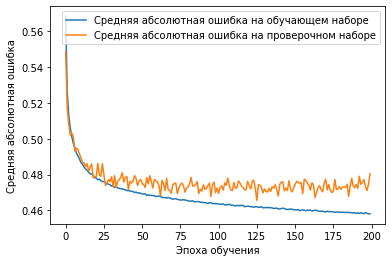

In [84]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏
modelS = Sequential()
modelS.add(BatchNormalization(input_shape=(xTrain01.shape[1],)))
modelS.add(Dense(128, activation='relu'))
modelS.add(Dense(1000, activation='tanh'))
modelS.add(Dense(100, activation='relu'))
modelS.add(Dense(1, activation='linear'))

modelS.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = modelS.fit(xTrain01, 
                    yTrainScaled, 
                    epochs=200, 
                    batch_size=1500,
                    validation_split=0.15, 
                    verbose=2)

plt.plot(history.history['mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ')
plt.plot(history.history['val_mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ')
plt.xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞')
plt.legend()
plt.show()

In [85]:
# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∏ –ø—Ä–∏–≤–æ–¥–∏–º –µ–≥–æ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–º—É –≤–∏–¥—É
pred = modelS.predict(xTrain01)
predUnscaled = yScaler.inverse_transform(pred).flatten()

# –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ 
delta = predUnscaled - yTrain
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

16.44152392375367


In [92]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è —Ç–µ—Å—Ç–∞
pred = modelS.predict(xTest)
predUnscaled = yScaler.inverse_transform(pred).flatten()
predUnscaled[3]

32.784748

In [93]:
pred = predUnscaled*1000
#result = 
#result.head()

print(pred)

[42338.125 42545.684 71971.24  ... 52198.355 33639.79  24758.516]


In [63]:
pred.reshape(-1,1)

array([[40487.07 ],
       [37510.617],
       [57185.383],
       ...,
       [50428.54 ],
       [26704.502],
       [23455.713]], dtype=float32)

In [94]:
test['salary'] = pred
solution = test[['id','salary']]

In [95]:
solution.to_csv('/content/drive/MyDrive/Hakaton/solution.csv', sep=',', index=False)

## –û—Ü–µ–Ω–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤





In [89]:
yy = model.predict(xTrain01) # –†–µ–∑—É–ª—å—Ç–∞—Ç –¥–ª—è –≤—Å–µ–≥–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞

In [90]:
n = 10
for i in range(n):
  print('–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ - ',yTrain[i], " –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ - ", yy[i][0], " –†–∞–∑–Ω–∏—Ü–∞ - ", abs(yTrain[i]-yy[i][0]))

–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  37.5  –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  41.287395  –†–∞–∑–Ω–∏—Ü–∞ -  3.787395477294922
–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  14.0  –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  30.118807  –†–∞–∑–Ω–∏—Ü–∞ -  16.118806838989258
–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  24.6  –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  31.679356  –†–∞–∑–Ω–∏—Ü–∞ -  7.079355621337889
–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  16.075  –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  37.569946  –†–∞–∑–Ω–∏—Ü–∞ -  21.4949462890625
–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  22.08  –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  45.400463  –†–∞–∑–Ω–∏—Ü–∞ -  23.32046310424805
–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  31.14  –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  30.82586  –†–∞–∑–Ω–∏—Ü–∞ -  0.3141409301757818
–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  27.6  –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  43.964947  –†–∞–∑–Ω–∏—Ü–∞ -  16.36494674682617
–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ -  

##–ò—Å–ø–æ–ª—å–∑—É–µ–º –ø—Ä–æ—Å—Ç—ã–µ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ


In [10]:
# –í—ã–∫–∞—á–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏—è–º
def getXTrainTProf(values):
  xTrainTProf = []
  
  for val in values:
    currText = ""
    if (type(val) != float):
      currText += val
    
    
     # –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å–ª–∏ –µ—Å—Ç—å –¥–∞–Ω–Ω—ã–µ –æ –∑–∞—Ä–ø–ª–∞—Ç–µ
    xTrainTProf.append(currText)
  
  xTrainTProf = np.array(xTrainTProf)
  
  return xTrainTProf

In [11]:
# –í—ã—Ç–∞—Å–∫–∏–≤–∞–µ–º –ø—Ä–æ—Ñ–µ—Å–∏–∏ –¥–ª—è –≤—ã–±–æ—Ä–∫–∏
xTrainTProf = getXTrainTProf(fixed_df.position) 
print(xTrainTProf[:100]) # –ø—Ä–∏–º–µ—Ä –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ 11–≥–æ —Ä–µ–∑—é–º–µ

['–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç' '–õ–∞–±–æ—Ä–∞–Ω—Ç' '–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç, –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä, –±—É—Ö–≥–∞–ª—Ç–µ—Ä, —ç–∫–æ–Ω–æ–º–∏—Å—Ç'
 '–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç' '–ò–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä –ø–æ –ø–ª–∞–≤–∞–Ω–∏—é' '—É—á–∏—Ç–µ–ª—å —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏'
 '–∫–æ–Ω—Ç—Ä–æ–ª–µ—Ä –æ—Ç–∫'
 '–Æ—Ä–∏—Å—Ç, –Æ—Ä–∏—Å–ø—Ä—É–¥–µ–Ω—Ü–∏—è, –§–°–°–ü, –§–µ–¥–µ—Ä–∞–ª—å–Ω–∞—è –°–ª—É–∂–±–∞ –°—É–¥–µ–±–Ω—ã—Ö –ü—Ä–∏—Å—Ç–∞–≤–æ–≤.'
 '–ö–æ–Ω–¥–∏—Ç–µ—Ä' '–ë—É—Ä–∏–ª—å—â–∏–∫ –≠–†–ë–°' '–û–ø–µ—Ä–∞—Ç–æ—Ä –∫–æ—Ç–µ–ª—å–Ω–æ–π'
 '–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ —Ç—É—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏–º —É—Å–ª—É–≥–∞–º' '–≥–ª–∞–≤–Ω—ã–π –º–µ—Ö–∞–Ω–∏–∫, –º–µ—Ö–∞–Ω–∏–∫'
 '–ú–µ–¥–∏—Ü–∏–Ω—Å–∫–∞—è —Å–µ—Å—Ç—Ä–∞' '–ò–Ω—Å–ø–µ–∫—Ç–æ—Ä' '–ø–æ–¥—Å–æ–±–Ω—ã–π —Ä–∞–±–æ—á–∏–π' '–∏—â—É —Ä–∞–±–æ—Ç—É'
 '–±—É—Ö–≥–∞–ª—Ç–µ—Ä' '–Æ—Ä–∏—Å—Ç' '–ú–µ–Ω–µ–¥–∂–µ—Ä, –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä, –¥–∏—Ä–µ–∫—Ç–æ—Ä'
 '–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω–æ–π —Å–ª—É–∂–±—ã' '–°–∞–Ω–∏—Ç–∞—Ä–∫–∞' '–õ–∞–±–æ—Ä–∞–Ω—Ç'
 '–°—Ç—Ä–æ–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ñ–µ—Ä–∞' '–†–∞—Å–∫—Ä–æ–π—â–∏—Ü–∞ –Ω–∞—Ç—è–∂

In [35]:
len(xTrainTProf)

303851

In [12]:
#################
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ —á–∏—Å–ª–æ–≤—ã–µ/–≤–µ–∫—Ç–æ—Ä–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –Ω–µ–π—Ä–æ—Å–µ—Ç—å—é
#################

maxWordsCount = 5000 #–æ–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∞–∫—Å.–∫–æ–ª-–≤–æ —Å–ª–æ–≤/–∏–Ω–¥–µ–∫—Å–æ–≤, —É—á–∏—Ç—ã–≤–∞–µ–º–æ–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤

#–¥–ª—è —ç—Ç–æ–≥–æ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –≤—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –≤ Keras —Ñ—É–Ω–∫—Ü–∏–µ–π Tokenizer –¥–ª—è —Ä–∞–∑–±–∏–µ–Ω–∏—è —Ç–µ–∫—Å—Ç–∞ –∏ –ø—Ä–µ–≤—Ä–∞—â–µ–Ω–∏—è –≤ –º–∞—Ç—Ä–∏—Ü—É —á–∏—Å–ª–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-‚Äì‚Äî./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=True)
#–≤—ã—à–µ –∑–∞–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
#(num_words=maxWordsCount) - –æ–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∞–∫—Å.–∫–æ–ª-–≤–æ —Å–ª–æ–≤/–∏–Ω–¥–µ–∫—Å–æ–≤, —É—á–∏—Ç—ã–≤–∞–µ–º–æ–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤0
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - –∏–∑–±–∞–≤–ª—è–µ–º—Å—è –æ—Ç –Ω–µ–Ω—É–∂–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤
#(lower=True) - –ø—Ä–∏–≤–æ–¥–∏–º —Å–ª–æ–≤–∞ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
#(split=' ') - —Ä–∞–∑–¥–µ–ª—è–µ–º —Å–ª–æ–≤–∞ –ø–æ –ø—Ä–æ–±–µ–ª—É
#(char_level=False) - –ø—Ä–æ—Å–∏–º —Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä –Ω–µ —É–¥–∞–ª—è—Ç—å –æ–¥–Ω–æ–±—É–∫–≤–µ–Ω–Ω—ã–µ —Å–ª–æ–≤–∞

tokenizer.fit_on_texts(xTrainTProf) # "—Å–∫–∞—Ä–º–ª–∏–≤–∞–µ–º" –Ω–∞—à–∏ —Ç–µ–∫—Å—Ç—ã, —Ç.–µ –¥–∞—ë–º –≤ –æ–±—Ä–∞–±–æ—Ç–∫—É –º–µ—Ç–æ–¥—É, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–±–µ—Ä–µ—Ç —Å–ª–æ–≤–∞—Ä—å —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç–∏
items = list(tokenizer.word_index.items())  #–í—ã—Ç–∞—Å–∫–∏–≤–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã —Å–ª–æ–≤ –¥–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞

In [13]:
#–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º —Ç–µ–∫—Å—Ç –≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–Ω–¥–µ–∫—Å–æ–≤ —Å–æ–≥–ª–∞—Å–Ω–æ —á–∞—Å—Ç–æ—Ç–Ω–æ–º—É —Å–ª–æ–≤–∞—Ä—é
xTrainProfIndexes = tokenizer.texts_to_sequences(xTrainTProf) #–æ–±—É—á–∞—é—â–∏–µ —Ç–µ—Å—Ç—ã –≤ –∏–Ω–¥–µ–∫—Å—ã

## –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–π –∏ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏

*–†–∞–∑–±–æ—Ä –¥–∞–Ω–Ω–æ–≥–æ —Ä–∞–∑–¥–µ–ª–∞:* https://youtu.be/h8cOCvlYmN8?t=1451


In [14]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤—ã–±–æ—Ä–∫–∏ –∏–∑ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏–Ω–¥–µ–∫—Å–æ–≤ –≤ –º–∞—Ç—Ä–∏—Ü—ã –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü –ø–æ –ø—Ä–∏–Ω—Ü–∏–ø—É Bag of Words
xTrainProf01 = tokenizer.sequences_to_matrix(xTrainProfIndexes) # –ü–æ–¥–∞–µ–º xTrain –≤ –≤–∏–¥–µ —Å–ø–∏—Å–∫–∞ —á—Ç–æ–±—ã –º–µ—Ç–æ–¥ —É—Å–ø–µ—à–Ω–æ —Å—Ä–∞–±–æ—Ç–∞–ª
print(xTrainProf01.shape)                                       # –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏, —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ Bag of Words
print(xTrainProf01[0][0:50])        

(303851, 5000)
[0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [39]:
n = 0
print(xTrainTProf[n])       # –ü—Ä–æ—Ñ–µ—Å—Å–∏—è
print(xTrainProfIndexes[n]) # –ü—Ä–æ—Ñ–µ—Å—Å–∏—è —á–µ—Ä–µ–∑ –∏–Ω–¥–µ–∫—Å—ã

–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç
[10, 14, 3, 23, 4, 5, 11, 4, 10, 7]


In [40]:
xTrainProf01.shape

(303851, 1000)

In [32]:
yTrain.shape

(303851,)

##–û–±—É—á–∞–µ–º –Ω–µ–π—Ä–æ–Ω–∫—É –Ω–∞ –ø—Ä–æ—Å—Ç—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [ ]:
# –ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –ø–æ –ø—Ä–µ–¥—ã–¥—É—â–µ–π —Ä–∞–±–æ—Ç–µ –∏ –∂–µ–ª–∞–µ–º–æ–π
modelTProf = Sequential()
modelTProf.add(Dense(20, activation='relu', input_dim=(xTrainProf01.shape[1]) ) )
modelTProf.add(Dense(500, activation='relu'))
modelTProf.add(Dense(1, activation='linear'))

modelTProf.compile(optimizer=Adagrad(lr=1e-3), loss='mse', metrics=['mae'])

history = modelTProf.fit(xTrainProf01[:50000], 
                    yTrain[:50000], 
                    batch_size=20,
                    epochs=50, 
                    #validation_split=0.1, 
                    validation_data=(xTrainProf01[50000:], yTrain[50000:]),
                    verbose=1, shuffle=True)

plt.plot(history.history['mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ')
plt.plot(history.history['val_mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ')
plt.xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞')
plt.legend()
plt.show()

Epoch 1/50
2481/2500 [============================>.] - ETA: 0s - loss: 1969.6424 - mae: 28.1387

In [ ]:
del xTrainProf01 # –£–¥–∞–ª—è–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –∏–Ω–∞—á–µ –¥–∞–ª—å—à–µ –º–æ–∂–µ—Ç –≤—ã–ª–µ—Ç–µ—Ç—å –∏–∑-–∑–∞ –Ω–µ—Ö–≤–∞—Ç–∫–∏ –ø–∞–º—è—Ç–∏

In [44]:
modelTProf.save('/content/drive/MyDrive/Hakaton/simple_text.h5')

##–ó–∞–≥—Ä—É–∂–∞–µ–º —Å–ª–æ–∂–Ω—ã–µ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ

*–†–∞–∑–±–æ—Ä –¥–∞–Ω–Ω–æ–≥–æ —Ä–∞–∑–¥–µ–ª–∞:* https://youtu.be/h8cOCvlYmN8?t=1566

In [ ]:
# –í—ã–∫–∞—á–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ —Ä–µ–∑—é–º–µ
def getXTrainTRez(values):
  xTrainTRez = []
  
  for val in values:
    currText = ""
    if (type(val[6]) != float):
      currText += val[6]
    
    if (getParameterSalary(val[1]) != -1):
      xTrainTRez.append(currText)
  
  xTrainTRez = np.array(xTrainTRez)
  
  return xTrainTRez

In [ ]:
# –í—ã—Ç–∞—Å–∫–∏–≤–∞–µ–º —Ä–µ–∑—é–º–µ –¥–ª—è –≤—ã–±–æ—Ä–∫–∏
xTrainTRez = getXTrainTRez(fixed_df.values)

In [ ]:
print(xTrainTRez[10]) # –ü—Ä–∏–º–µ—Ä –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ 11–≥–æ —Ä–µ–∑—é–º–µ

–û–ø—ã—Ç —Ä–∞–±–æ—Ç—ã 27 –ª–µ—Ç 4 –º–µ—Å—è—Ü–∞  –ü—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç 2 000 EUR –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç, —Ç–µ–ª–µ–∫–æ–º –ü—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ, –†–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –°–∏—Å—Ç–µ–º–Ω–∞—è –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è –ó–∞–Ω—è—Ç–æ—Å—Ç—å: –ø–æ–ª–Ω–∞—è –∑–∞–Ω—è—Ç–æ—Å—Ç—å –ì—Ä–∞—Ñ–∏–∫ —Ä–∞–±–æ—Ç—ã: –ø–æ–ª–Ω—ã–π –¥–µ–Ω—å –û–ø—ã—Ç —Ä–∞–±–æ—Ç—ã 27 –ª–µ—Ç 4 –º–µ—Å—è—Ü–∞ –Ø–Ω–≤–∞—Ä—å 2008 ‚Äî –ø–æ –Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è 11 –ª–µ—Ç 4 –º–µ—Å—è—Ü–∞ –ö–æ–Ω—Å–∞–ª—Ç–∏–Ω–≥ –ö–ê–° –ì–ª–∞–≤–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –ü—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –≤–µ—Ä—Å–∏—è—Ö RPG –¥–ª—è AS/400 (iSeries). –ú–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—è –∏ –¥–æ—Ä–∞–±–æ—Ç–∫–∞ —Å—É—â–µ—Å—Ç–≤—É—é—â–µ–≥–æ –∫–æ–¥–∞, —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ —Å–∏—Å—Ç–µ–º—ã. –†–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –Ω–æ–≤—ã—Ö –º–æ–¥—É–ª–µ–π –∏ –ø–æ–¥—Å–∏—Å—Ç–µ–º. –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –∑–∞–¥–∞—á, —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–∞–º–∏. –Ø–Ω–≤–∞—Ä—å 1993 ‚Äî –Ø–Ω–≤–∞—Ä—å  2008 15 –ª–µ—Ç 1 –º–µ—Å

In [ ]:
#################
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ —á–∏—Å–ª–æ–≤—ã–µ/–≤–µ–∫—Ç–æ—Ä–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –Ω–µ–π—Ä–æ—Å–µ—Ç—å—é
#################

maxWordsCount = 5000 #–æ–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∞–∫—Å.–∫–æ–ª-–≤–æ —Å–ª–æ–≤/–∏–Ω–¥–µ–∫—Å–æ–≤, —É—á–∏—Ç—ã–≤–∞–µ–º–æ–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤

#–¥–ª—è —ç—Ç–æ–≥–æ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –≤—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –≤ Keras —Ñ—É–Ω–∫—Ü–∏–µ–π Tokenizer –¥–ª—è —Ä–∞–∑–±–∏–µ–Ω–∏—è —Ç–µ–∫—Å—Ç–∞ –∏ –ø—Ä–µ–≤—Ä–∞—â–µ–Ω–∏—è –≤ –º–∞—Ç—Ä–∏—Ü—É —á–∏—Å–ª–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-‚Äì‚Äî./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
#–≤—ã—à–µ –∑–∞–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
#(num_words=maxWordsCount) - –æ–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∞–∫—Å.–∫–æ–ª-–≤–æ —Å–ª–æ–≤/–∏–Ω–¥–µ–∫—Å–æ–≤, —É—á–∏—Ç—ã–≤–∞–µ–º–æ–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - –∏–∑–±–∞–≤–ª—è–µ–º—Å—è –æ—Ç –Ω–µ–Ω—É–∂–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤
#(lower=True) - –ø—Ä–∏–≤–æ–¥–∏–º —Å–ª–æ–≤–∞ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
#(split=' ') - —Ä–∞–∑–¥–µ–ª—è–µ–º —Å–ª–æ–≤–∞ –ø–æ –ø—Ä–æ–±–µ–ª—É
#(char_level=False) - –ø—Ä–æ—Å–∏–º —Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä –Ω–µ —É–¥–∞–ª—è—Ç—å –æ–¥–Ω–æ–±—É–∫–≤–µ–Ω–Ω—ã–µ —Å–ª–æ–≤–∞

tokenizer.fit_on_texts(xTrainTRez)         # "—Å–∫–∞—Ä–º–ª–∏–≤–∞–µ–º" –Ω–∞—à–∏ —Ç–µ–∫—Å—Ç—ã, —Ç.–µ –¥–∞—ë–º –≤ –æ–±—Ä–∞–±–æ—Ç–∫—É –º–µ—Ç–æ–¥—É, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–±–µ—Ä–µ—Ç —Å–ª–æ–≤–∞—Ä—å —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç–∏
items = list(tokenizer.word_index.items()) # –í—ã—Ç–∞—Å–∫–∏–≤–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã —Å–ª–æ–≤ –¥–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞

In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º —Ç–µ–∫—Å—Ç –≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–Ω–¥–µ–∫—Å–æ–≤ —Å–æ–≥–ª–∞—Å–Ω–æ —á–∞—Å—Ç–æ—Ç–Ω–æ–º—É —Å–ª–æ–≤–∞—Ä—é
xTrainRezIndexes = tokenizer.texts_to_sequences(xTrainTRez) # –û–±—É—á–∞—é—â–∏–µ —Ç–µ—Å—Ç—ã –≤ –∏–Ω–¥–µ–∫—Å—ã

## –°–æ–∑–¥–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–π –∏ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏

–§—É–Ω–∫—Ü–∏–∏ –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ –ø–æ –æ—Ç—Ä–µ–∑–∫–∞–º —Ç–µ–∫—Å—Ç–∞ —Å –∑–∞–¥–∞–Ω–Ω—ã–º —à–∞–≥–æ–º

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
xTrainRez01 = tokenizer.sequences_to_matrix(xTrainRezIndexes) # –ü–æ–¥–∞–µ–º xTrain –≤ –≤–∏–¥–µ —Å–ø–∏—Å–∫–∞ —á—Ç–æ–±—ã –º–µ—Ç–æ–¥ —É—Å–ø–µ—à–Ω–æ —Å—Ä–∞–±–æ—Ç–∞–ª
print(xTrainRez01.shape)                                      # –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏, —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ Bag of Words
print(xTrainRez01[0][0:100])    

(62967, 5000)
[0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0.]


In [ ]:
print(xTrainRez01.shape) # –†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
print(xTrainRez01[555]) # –ü—Ä–∏–º–µ—Ä –∏–∑ –æ—Ç—Ñ–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏

(62967, 5000)
[0. 0. 1. ... 0. 0. 0.]


##–û–±—É—á–∞–µ–º –Ω–µ–π—Ä–æ–Ω–∫—É –Ω–∞ —Å–ª–æ–∂–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö




Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 15660.3145 - mae: 27.4569 - val_loss: 1513.4458 - val_mae: 24.8467
Epoch 2/20
2500/2500 [==============================] - 5s 2ms/step - loss: 14903.1260 - mae: 23.8727 - val_loss: 1540.6873 - val_mae: 25.7508
Epoch 3/20
2500/2500 [==============================] - 5s 2ms/step - loss: 14090.9912 - mae: 22.9985 - val_loss: 1428.7754 - val_mae: 23.5003
Epoch 4/20
2500/2500 [==============================] - 6s 2ms/step - loss: 13188.4990 - mae: 21.2798 - val_loss: 1505.1117 - val_mae: 23.7810
Epoch 5/20
2500/2500 [==============================] - 5s 2ms/step - loss: 11952.0039 - mae: 19.8930 - val_loss: 1428.9722 - val_mae: 23.5358
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 10167.0332 - mae: 18.7258 - val_loss: 2941.7305 - val_mae: 31.4668
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 9631.6514 - mae: 18.8640 - val_loss: 1475.1525 - val_mae: 23.7413


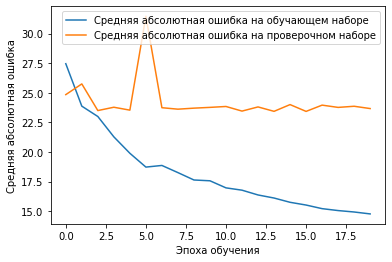

In [ ]:
# –∑–¥–µ—Å—å –≤ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö maxWordCount = 2000
modelTRez = Sequential()
modelTRez.add(Dense(20, activation='relu',input_dim=(xTrainRez01.shape[1])))
modelTRez.add(Dense(500, activation='relu'))
modelTRez.add(Dropout(0.3))
modelTRez.add(Dense(1, activation='linear'))
 
modelTRez.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['mae'])
 
history = modelTRez.fit(xTrainRez01[:50000], 
                    yTrain[:50000], 
                    batch_size=20,
                    epochs=20, 
                    validation_data=(xTrainRez01[50000:], yTrain[50000:]),
                    verbose=1, shuffle=True)
 
plt.plot(history.history['mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ')
plt.plot(history.history['val_mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ')
plt.xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞')
plt.legend()
plt.show()

##–°–æ—Å—Ç–∞–≤–Ω–∞—è –Ω–µ–π—Ä–æ–Ω–∫–∞



In [15]:
input1 = Input((xTrain01.shape[1],))
input2 = Input((xTrainProf01.shape[1],))
#input3 = Input((xTrainRez01.shape[1],))

x1 = BatchNormalization()(input1) # –°–æ–∑–¥–∞–µ–º –≤–µ—Ç–∫—É —Ö1
x1 = Dropout(0.5)(x1)
x1 = Dense(10, activation="relu")(x1)
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(100, activation = "relu")(x1)

x2 = BatchNormalization()(input2) # –°–æ–∑–¥–∞–µ–º –≤–µ—Ç–∫—É —Ö2
x2 = Dense(25, activation="relu")(input2)
x2 = Dense(8, activation="tanh")(x2)
x2 = Dense(5, activation = "elu")(x2)

#x3 = BatchNormalization()(input3) # –°–æ–∑–¥–∞–µ–º –≤–µ—Ç–∫—É —Ö3
#x3 = Dense(1000, activation="tanh")(input3)
#x3 = Dense(20, activation = "elu")(x3)
#x3 = Dense(5, activation = "elu")(x3)

x = concatenate([x1, x2]) # –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ —Ç—Ä–∏ –≤–µ—Ç–∫–∏

x = Dense(15, activation='linear')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='relu')(x) # –§–∏–Ω–∞–ª—å–Ω—ã–π –Ω–µ–π—Ä–æ–Ω, –¥–µ–ª–∞–µ—Ç —Ä–µ–≥—Ä–µ—Å—Å–∏—é

model = Model((input1, input2), x) # –í Model –∑–∞–≥—Ä—É–∂–∞–µ–º —Å—Ç–∞—Ä—Ç–æ–≤—ã–µ –∏ –ø–æ—Å–ª–µ–¥–Ω—é—é —Ç–æ—á–∫–∏ 

model.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['mae'])

history = model.fit([xTrain01[:50000], xTrainProf01[:50000]], 
                    yTrain[:50000], 
                    epochs= 80, 
                    validation_data=([xTrain01[50000:], xTrainProf01[50000:]], 
                    yTrain[50000:]), 
                    verbose=1, shuffle=True)

Epoch 1/80
1563/1563 [==============================] - 30s 17ms/step - loss: 1500.4421 - mae: 22.3871 - val_loss: 940.3130 - val_mae: 17.3244
Epoch 2/80
1563/1563 [==============================] - 24s 16ms/step - loss: 1191.5761 - mae: 19.7223 - val_loss: 981.5781 - val_mae: 16.7958
Epoch 3/80
1563/1563 [==============================] - 25s 16ms/step - loss: 1169.3249 - mae: 19.7083 - val_loss: 959.8932 - val_mae: 16.5889
Epoch 4/80
1563/1563 [==============================] - 26s 16ms/step - loss: 1142.7996 - mae: 19.2777 - val_loss: 942.5017 - val_mae: 16.7426
Epoch 5/80
1563/1563 [==============================] - 25s 16ms/step - loss: 1344.0696 - mae: 19.5519 - val_loss: 920.5020 - val_mae: 16.9710
Epoch 6/80
1563/1563 [==============================] - 25s 16ms/step - loss: 1116.4081 - mae: 19.0428 - val_loss: 985.9606 - val_mae: 16.3841
Epoch 7/80
1563/1563 [==============================] - 24s 15ms/step - loss: 1215.6286 - mae: 19.2362 - val_loss: 986.0775 - val_mae: 16.3500

In [1]:
plt.plot(history.history['mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ')
plt.plot(history.history['val_mae'], 
         label='–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ')
plt.xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞')
plt.legend()
plt.show()

NameError: ignored

In [47]:
model.save('/content/drive/MyDrive/Hakaton/complex.h5')

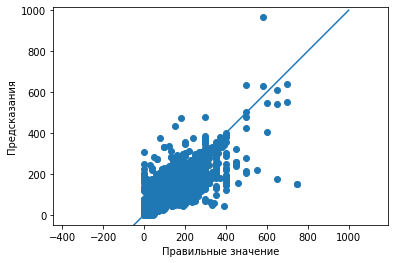

In [ ]:
yy = yTrain[50000:] # –ó–∞—Ä–ø–ª–∞—Ç–∞
pred = model.predict([xTrain01[50000:], xTrainRez01[50000:]]) # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞
plt.scatter(yy, pred)
plt.xlabel('–ü—Ä–∞–≤–∏–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏–µ')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000])
plt.show()

In [64]:
del xTrainRez01, xTrainRezIndexes # –£–¥–∞–ª—è–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ, –∏–Ω–∞—á–µ –¥–∞–ª—å—à–µ –º–æ–∂–µ—Ç –≤—ã–ª–µ—Ç–µ—Ç—å –∏–∑-–∑–∞ –Ω–µ—Ö–≤–∞—Ç–∫–∏ –ø–∞–º—è—Ç–∏

NameError: ignored

In [48]:
XTest = getXTrainTProf(test.position) 

In [50]:
#################
#–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ —á–∏—Å–ª–æ–≤—ã–µ/–≤–µ–∫—Ç–æ—Ä–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –Ω–µ–π—Ä–æ—Å–µ—Ç—å—é
#################

maxWordsCount = 1000 #–æ–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∞–∫—Å.–∫–æ–ª-–≤–æ —Å–ª–æ–≤/–∏–Ω–¥–µ–∫—Å–æ–≤, —É—á–∏—Ç—ã–≤–∞–µ–º–æ–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤

#–¥–ª—è —ç—Ç–æ–≥–æ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –≤—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –≤ Keras —Ñ—É–Ω–∫—Ü–∏–µ–π Tokenizer –¥–ª—è —Ä–∞–∑–±–∏–µ–Ω–∏—è —Ç–µ–∫—Å—Ç–∞ –∏ –ø—Ä–µ–≤—Ä–∞—â–µ–Ω–∏—è –≤ –º–∞—Ç—Ä–∏—Ü—É —á–∏—Å–ª–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-‚Äì‚Äî./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=True)
#–≤—ã—à–µ –∑–∞–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
#(num_words=maxWordsCount) - –æ–ø—Ä–µ–¥–µ–ª—è–µ–º –º–∞–∫—Å.–∫–æ–ª-–≤–æ —Å–ª–æ–≤/–∏–Ω–¥–µ–∫—Å–æ–≤, —É—á–∏—Ç—ã–≤–∞–µ–º–æ–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤0
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - –∏–∑–±–∞–≤–ª—è–µ–º—Å—è –æ—Ç –Ω–µ–Ω—É–∂–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤
#(lower=True) - –ø—Ä–∏–≤–æ–¥–∏–º —Å–ª–æ–≤–∞ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
#(split=' ') - —Ä–∞–∑–¥–µ–ª—è–µ–º —Å–ª–æ–≤–∞ –ø–æ –ø—Ä–æ–±–µ–ª—É
#(char_level=False) - –ø—Ä–æ—Å–∏–º —Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä –Ω–µ —É–¥–∞–ª—è—Ç—å –æ–¥–Ω–æ–±—É–∫–≤–µ–Ω–Ω—ã–µ —Å–ª–æ–≤–∞

tokenizer.fit_on_texts(XTest) # "—Å–∫–∞—Ä–º–ª–∏–≤–∞–µ–º" –Ω–∞—à–∏ —Ç–µ–∫—Å—Ç—ã, —Ç.–µ –¥–∞—ë–º –≤ –æ–±—Ä–∞–±–æ—Ç–∫—É –º–µ—Ç–æ–¥—É, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–±–µ—Ä–µ—Ç —Å–ª–æ–≤–∞—Ä—å —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç–∏
items = list(tokenizer.word_index.items())  #–í—ã—Ç–∞—Å–∫–∏–≤–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã —Å–ª–æ–≤ –¥–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞

In [51]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º —Ç–µ–∫—Å—Ç –≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–Ω–¥–µ–∫—Å–æ–≤ —Å–æ–≥–ª–∞—Å–Ω–æ —á–∞—Å—Ç–æ—Ç–Ω–æ–º—É —Å–ª–æ–≤–∞—Ä—é
XTestIndexes = tokenizer.texts_to_sequences(XTest) # –û–±—É—á–∞—é—â–∏–µ —Ç–µ—Å—Ç—ã –≤ –∏–Ω–¥–µ–∫—Å—ã

In [52]:
XTest01 = tokenizer.sequences_to_matrix(XTestIndexes) # –ü–æ–¥–∞–µ–º xTrain –≤ –≤–∏–¥–µ —Å–ø–∏—Å–∫–∞ —á—Ç–æ–±—ã –º–µ—Ç–æ–¥ —É—Å–ø–µ—à–Ω–æ —Å—Ä–∞–±–æ—Ç–∞–ª
print(XTest01.shape)                                      # –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏, —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ Bag of Words
print(XTest01[0][0:100])

(131259, 1000)
[0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [56]:
pred = model.predict([xTest, XTest01])

In [59]:
pred=pred*1000

In [61]:
pred.reshape(-1,1)

array([[42021.547],
       [44199.656],
       [57172.805],
       ...,
       [49404.832],
       [35103.473],
       [26353.844]], dtype=float32)

In [62]:
test['salary'] = pred
solution = test[['id','salary']]

In [63]:
solution.to_csv('/content/drive/MyDrive/Hakaton/solution1.csv', sep=',', index=False)